In [1]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd 
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import decomposition
from seaborn import heatmap as hmap

In [2]:
def dataload(files):
    col_idx = [5,6,7,8,9,10,11,14,15,16,17,18,19,22,23,24,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,45,52,53,54,55]
    dfl = pd.read_csv(files[0]).iloc[:, col_idx]
    dfr = pd.read_csv(files[1]).iloc[:, col_idx]
    intx = np.linspace(0,100, 50000)
    lx = np.linspace(0,100,dfl.shape[0])
    rx = np.linspace(0,100,dfr.shape[0])
    ly = dfl.to_numpy().T
    ry = dfr.to_numpy().T
    lint = interp1d(lx,ly,kind = 'linear')
    rint = interp1d(rx,ry,kind = 'linear')
    yintl = lint(intx).T
    yintr = rint(intx).T
    yout = np.concatenate((yintl,yintr), axis=1)
    ystand = np.zeros(np.shape(yout))
    for cid in range(np.shape(yout)[1]):
        ystand[:,cid] = preprocessing.scale(yout[:,cid])
    return ystand

In [3]:
filelist = pd.read_excel('filepairs.xlsx', index_col=0) 

In [4]:
inputdata = np.zeros([filelist.shape[0],50000,78])
for fid in range(filelist.shape[0]):
    inputdata[fid] = (dataload(filelist.iloc[fid]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered w

In [5]:
print(np.shape(inputdata))

(106, 50000, 78)


In [6]:
def custom_pca(features,n_comp):
    pca = decomposition.PCA(n_components=n_comp)
    #temporal PC score by features
    temp_pc_score = np.zeros([np.shape(features)[0],np.shape(features)[2]])
    feat_pc_score = np.zeros([np.shape(features)[0],np.shape(features)[1]])
    for p in range(np.shape(features)[2]):
        idata = features[:,:,p]
        temp_pc_score[:,p] = pca.fit_transform(idata).T
    #feature PC score by time
    for q in range(np.shape(features)[1]):
        idata = features[:,q,:]
        feat_pc_score[:,q] = pca.fit_transform(idata).T
    return temp_pc_score, feat_pc_score

In [7]:
t_score, f_score = custom_pca(inputdata, 1)

In [8]:
print(np.shape(t_score))
print(np.shape(f_score))

(106, 78)
(106, 50000)


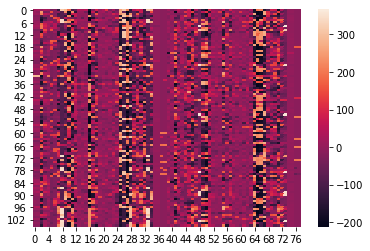

In [9]:
hmap(t_score)

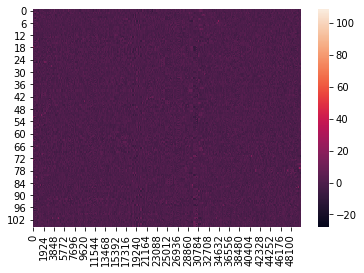

In [10]:
hmap(f_score)